In [1]:
import sys
sys.path.append("..")
import math
from mango.environments import frozen_lake
from utils_sim import env_params

feasible maps: more than 2.1991489691311088e+17


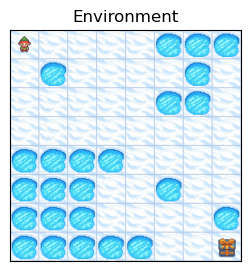

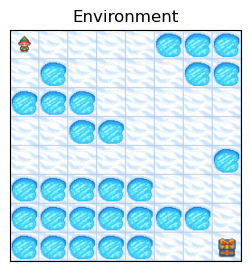

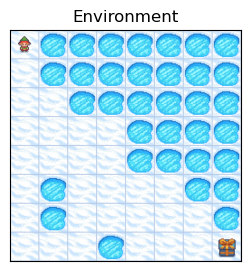

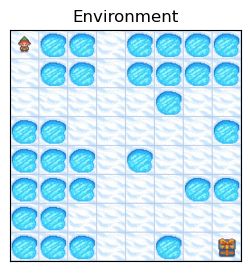

In [12]:
map_scale = 3
p_frozen = 0.5

# maps with 50% of frozen cells are comb(4**map_scale, 4**map_scale // 2)
# maps with 45-55% of frozen cells are roughly 0.1* 4**map_scale
# from empirical simulations more than 2% of this maps are feasible for 8x8
nmaps = math.comb(4**map_scale, 4**map_scale // 2) * (4**map_scale // 10) * (0.02)
print("feasible maps: more than", nmaps)

params = env_params(map_scale, p_frozen, seed=0)
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
for i in range(4):
    env.reset()
    frozen_lake.plot_utils.plot_map(env)